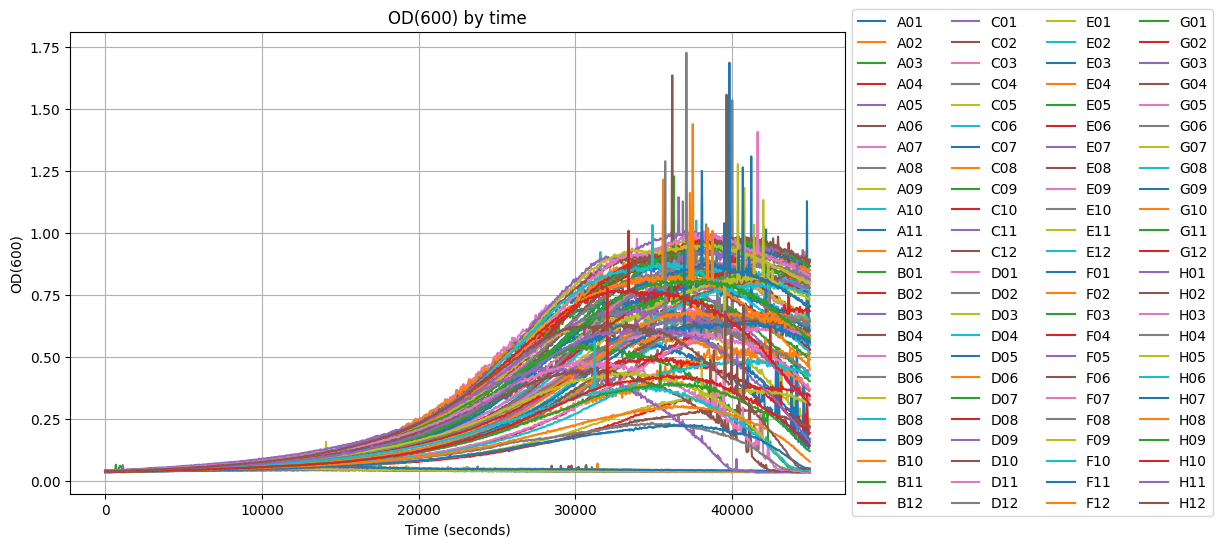

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# Read the CSV file
df = pd.read_csv('/Users/athero/Documents/Codingschool/abs_fast_timecourse_200215_1114.csv', header=None)

# Extract the times (19th row)
# Note: Python uses 0-based indexing, so we subtract 1 from the row numbers
times = df.iloc[18]  # 19th row for times
times = times[1:]  # Exclude the first column which is the data point name
times_in_seconds = pd.to_numeric(times)

# Plotting setup
plt.figure(figsize=(10, 6))

# # Loop through rows 20 to 40 (inclusive) for each series of values
# for i in range(19, 40):  # Adjusted for 0-based indexing
#     values = df.iloc[i][1:]  # Exclude the first column and extract values
#     plt.plot(times_in_seconds, values, marker='o', linestyle='-', label=f'Series {i-18}')

# Loop through rows 20 to 40 (inclusive) for each series of values
for i in range(19, 115):  # Adjusted for 0-based indexing
    values = df.iloc[i][1:]  # Exclude the first column and extract values
    data_point_name = df.iloc[i][0]  # Extract the data point name from the first column
    # plt.plot(times_in_seconds, values, marker='o', linestyle='-', label=data_point_name)
    plt.plot(times_in_seconds, values, linestyle='-', label=data_point_name)

plt.title('OD(600) by time')
plt.xlabel('Time (seconds)')
plt.ylabel('OD(600)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
plt.show()

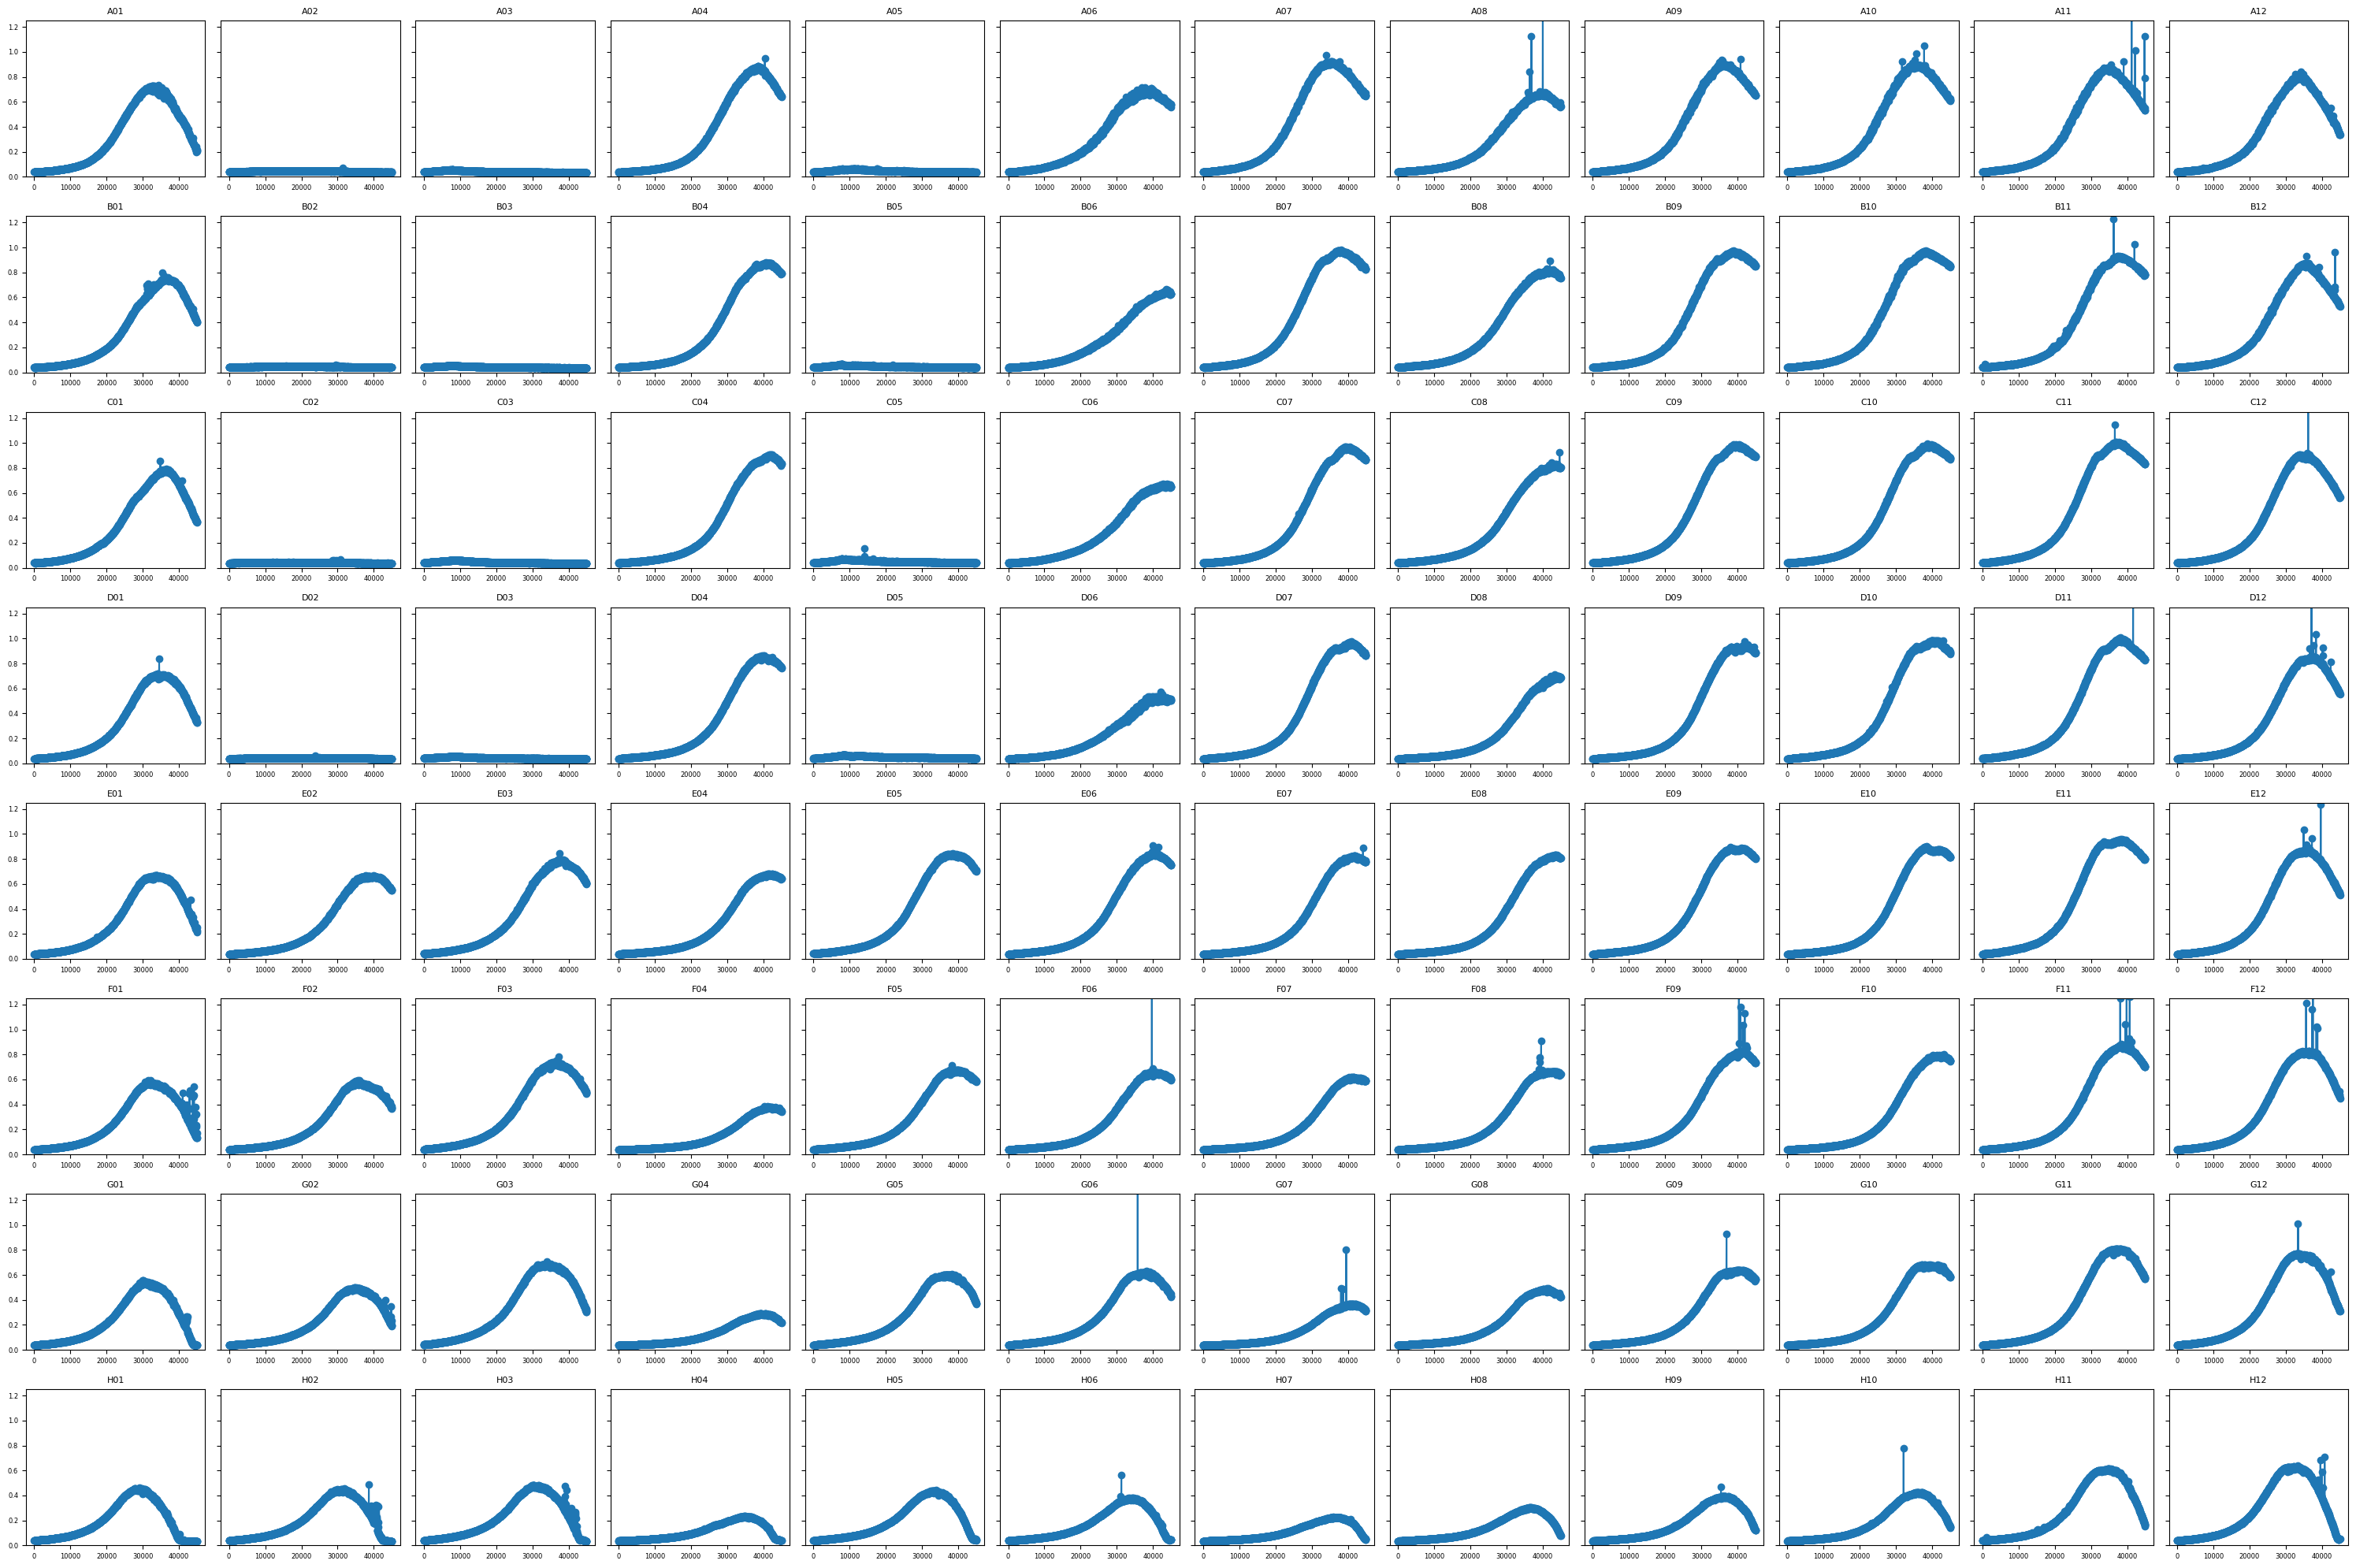

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# Read the CSV file
df = pd.read_csv('/Users/athero/Documents/Codingschool/abs_fast_timecourse_200215_1114.csv', header=None)

# Extract the times (19th row)
times = df.iloc[18][1:]  # Exclude the first column which is the data point name
times_in_seconds = pd.to_numeric(times)

# Setup for subplots
fig, axs = plt.subplots(8, 12, figsize=(30, 20), sharey=True)  # 8 rows, 12 columns, sharing y axis
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between plots
axs = axs.ravel()  # Flatten the array of axes

# Loop through rows 20 to 40 (inclusive) for each series of values
for i in range(19, 115):  # Adjusted for 0-based indexing
    values = df.iloc[i][1:]  # Exclude the first column and extract values
    data_point_name = df.iloc[i][0]  # Extract the data point name from the first column
    axs[i-19].plot(times_in_seconds, values, marker='o', linestyle='-')
    axs[i-19].set_title(data_point_name, fontsize=8)
    axs[i-19].tick_params(axis='x', labelsize=6)
    axs[i-19].tick_params(axis='y', labelsize=6)
    axs[i-19].set_ylim([0, 1.25])  # Set y axis range from 0 to 1.25

# Hide any unused subplots if not all are needed
for i in range(len(df.index)-19, 12*8): 
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

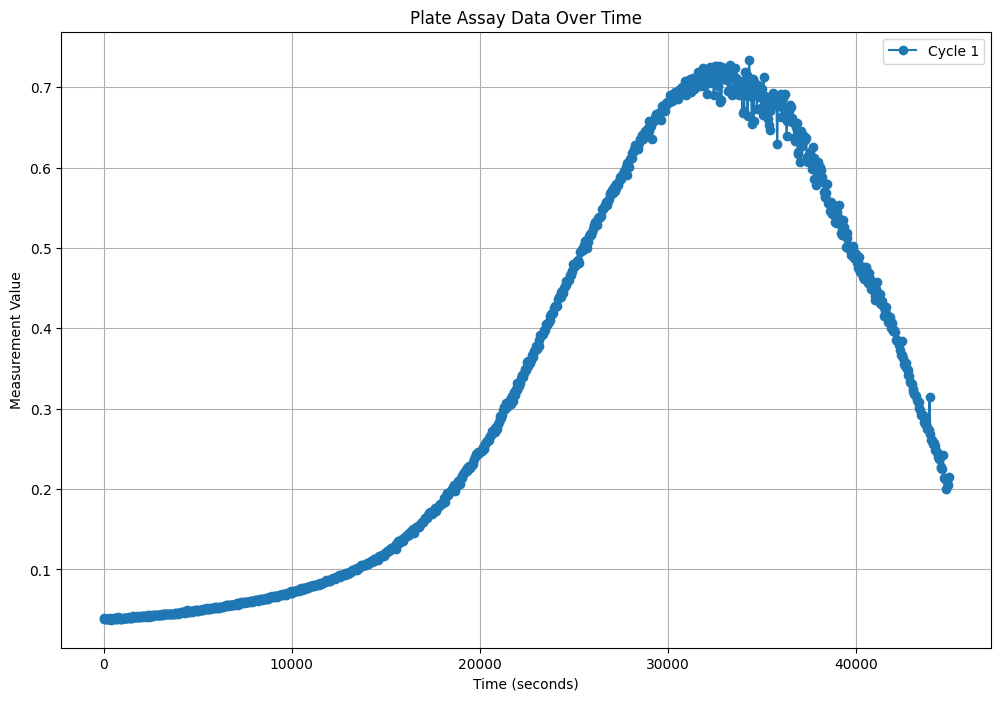

In [21]:
# Extract time values from the identified row
time_values = df.iloc[18, 1:].dropna().astype(float)

# Plotting setup
plt.figure(figsize=(12, 8))

# Select a subset of cycles to plot for clarity, e.g., every 100th cycle
selected_cycles = range(19, df.shape[0], 100)

for cycle in selected_cycles:
    # Extract measurement values for the selected cycle
    measurement_values = df.iloc[cycle, 1:].dropna().astype(float)
    plt.plot(time_values, measurement_values, marker='o', linestyle='-', label=f'Cycle {cycle-18}')

plt.title('Plate Assay Data Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Measurement Value')
plt.legend()
plt.grid(True)
plt.show()

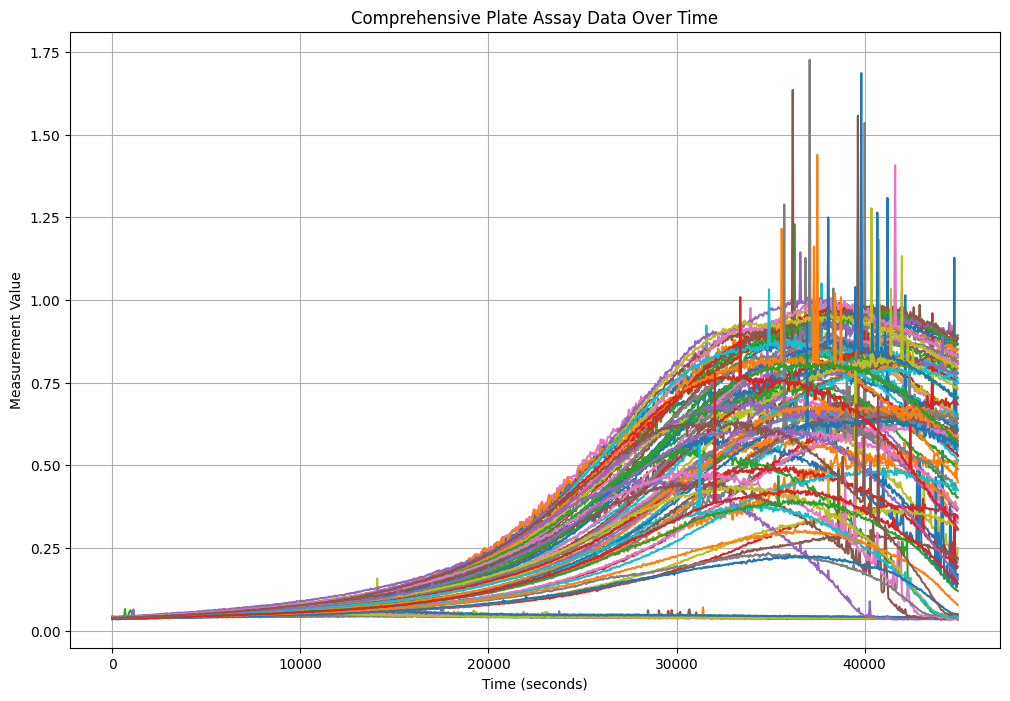

In [22]:
# Plotting setup for all values
plt.figure(figsize=(12, 8))

# Loop through all cycles starting from the identified data row
for cycle in range(19, df.shape[0]):
    # Extract measurement values for the cycle
    measurement_values = df.iloc[cycle, 1:].dropna().astype(float)
    if not measurement_values.empty:  # Ensure there are values to plot
        plt.plot(time_values[:len(measurement_values)], measurement_values, linestyle='-', label=f'Cycle {cycle-18}')

plt.title('Comprehensive Plate Assay Data Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Measurement Value')
# Due to the large number of cycles, we'll omit the legend to keep the plot readable
# plt.legend()
plt.grid(True)
plt.show()

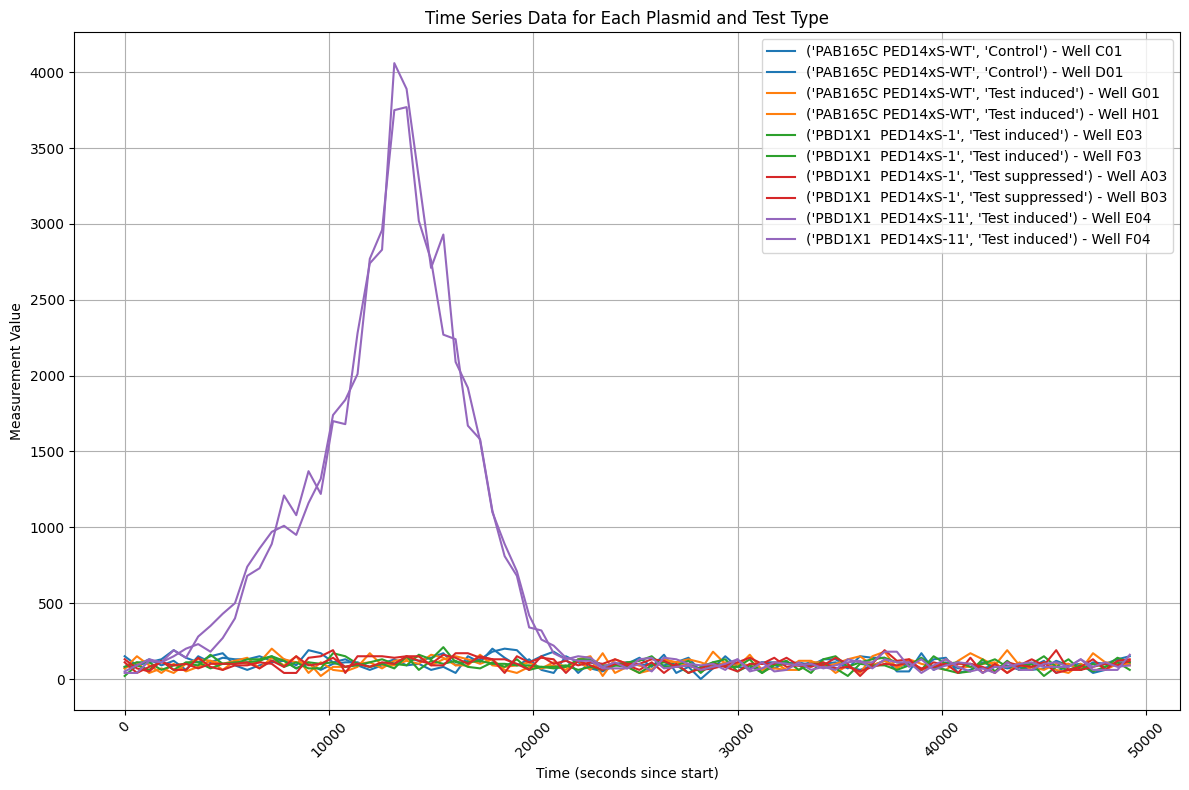

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
from datetime import datetime

# Load the kinetic data
kinetic_data_path = 'Erika example data/20200530_erika_taga_00001_reader_plate_1_kinetic_supp_3_high.csv'
kinetic_df = pd.read_csv(kinetic_data_path)

# Convert the first row to datetime and subtract the first timepoint to get time delta in seconds
time_points = pd.to_datetime(kinetic_df.columns[1:], format='%m/%d/%y %H:%M')
time_deltas = (time_points - time_points[0]).total_seconds()

# Load the manifest data
manifest_data_path = 'Erika example data/Manifest.csv'
manifest_df = pd.read_csv(manifest_data_path)

# Merge the kinetic data with the manifest data based on the well name (first column)
kinetic_df.set_index(kinetic_df.columns[0], inplace=True)
manifest_df.set_index(manifest_df.columns[1], inplace=True)
merged_df = kinetic_df.merge(manifest_df, left_index=True, right_index=True)

# Define a function to plot the time series data for a subset of groups
def plot_time_series(df, time_deltas, group_columns, title, num_groups=None):
    # Create a color cycle iterator to cycle through colors for each group
    color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    
    # Group the dataframe by the unique combinations of the specified columns
    grouped = df.groupby(group_columns)
    
    # If num_groups is specified, limit the number of groups to plot
    if num_groups is not None:
        grouped = islice(grouped, num_groups)
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    # Iterate over each group, plotting the time series with a unique color
    for (group_name, group_df), color in zip(grouped, color_cycle):
        # Extract the time series data (excluding the last 4 columns which are not timepoints)
        time_series_data = group_df.iloc[:, :len(time_deltas)]
        
        # Plot each row of the time series data
        for index, row in time_series_data.iterrows():
            plt.plot(time_deltas, row.values, label=f"{group_name} - Well {index}", color=color)
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Time (seconds since start)')
    plt.ylabel('Measurement Value')
    
    # Rotate x-axis labels to make them readable
    plt.xticks(rotation=45)
    
    # Show the legend and the plot
    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel/legend
    plt.grid(True)
    plt.show()

# Call the function to plot the time series data for a limited number of groups
plot_time_series(merged_df, time_deltas, ['plasmid', 'test_type'], 'Time Series Data for Each Plasmid and Test Type', num_groups=5)


,0,1,2,3,4
0,Plate 1,A01,PED13LNQSFGFP,Test suppressed,NaN
1,Plate 1,B01,PED13LNQSFGFP,Test suppressed,NaN
2,Plate 1,C01,PAB165C PED14xS-WT,Control,NaN
3,Plate 1,D01,PAB165C PED14xS-WT,Control,NaN
4,Plate 1,E01,PED13LNQSFGFP,Test induced,NaN
...,...,...,...,...,...
91,Plate 1,D12,S4,NaN,NaN
92,Plate 1,E12,PBS,NaN,NaN
93,Plate 1,F12,EMPTY,NaN,NaN
94,Plate 1,G12,EMPTY,NaN,NaN
